In [16]:
# 1. 파일 데이터 읽기
import csv

with open("data-files/seoul-covid-19.csv", "rt", encoding="utf-8") as f:
    covid_reader = csv.reader(f)

    titles = next(covid_reader) # next : 목록(iterator)에서 다음 행으로 이동 ( 제목 표시 행 건너뛰기 )

    rows = []
    for row in covid_reader:
        row[1:] = map(lambda v: int(v) , row[1:]) # 1번째 요소부터 마지막 요소까지 숫자로 변경
        rows.append(row)

In [17]:
# rows 데이터에 서울전체, 서울추가 항목 추가

titles = titles + ["서울 전체", "서울 추가"]

for row_idx, row in enumerate(rows):
    sum1 = sum2 = 0
    for col_idx, v in enumerate(row[1:]):
        if col_idx % 2 == 0:
            sum1 += v
        else:
            sum2 += v
    # rows[row_idx] = row + [sum1, sum2]
    row.append(sum1)
    row.append(sum2)

In [18]:
print( titles[-5:] )
print( len(titles), len(rows[10]) )

['강동구 추가', '기타 전체', '기타 추가', '서울 전체', '서울 추가']
55 55


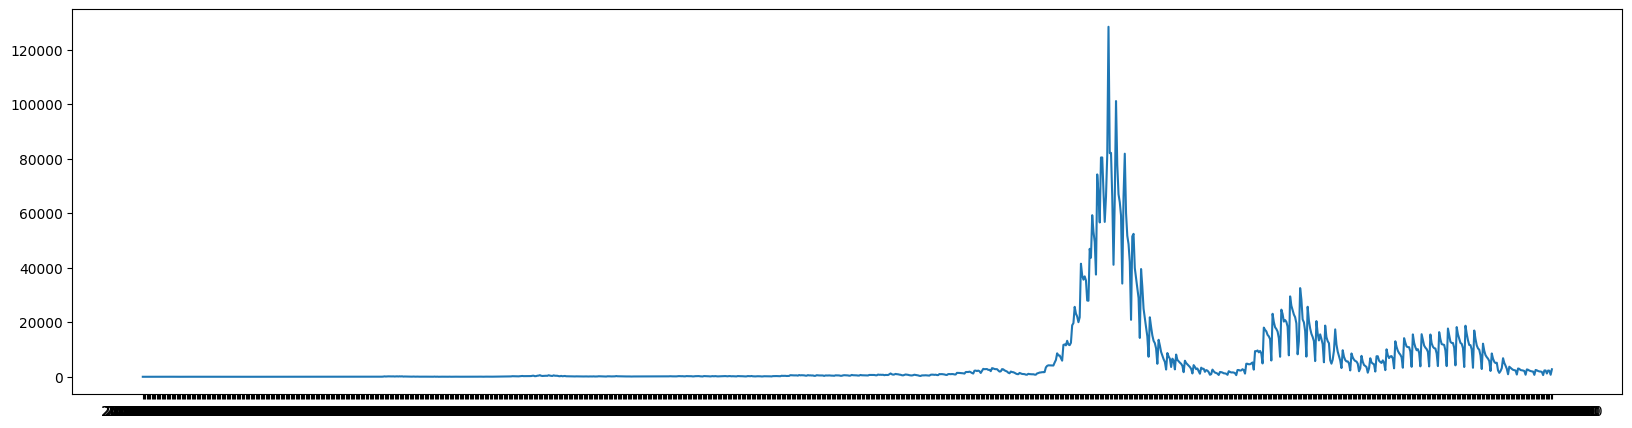

In [20]:
# 서울 추가 항목의 line plot 표시

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

## "서울 추가" 데이터 리스트 만들기 1
# y = []
# for row in rows:
#     data.append(row[-1])

## "서울 추가" 데이터 리스트 만들기 2
y = [ row[-1] for row in rows ]
x = [ row[0] for row in rows ]
y.reverse()
x.reverse()

plt.plot(x, y)
plt.show()


In [ ]:
# temperatur 전체 데이터에서 작업자의 생일의 기온 추출해서 
# 최고기온, 최저기온을 찾고 전체 데이터를 그래프로 표시 